In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
x_train.shape
#이미지 60,000장, 28 * 28 size (2차원 행렬 구조 )


(60000, 28, 28)

In [67]:
x_test.shape
#이미지 10,000장, 28 * 28 size (2차원 행렬 구조 )

(10000, 28, 28)

In [68]:
print('학습용 데이터 셋 이미지수 : %d장' %x_train.shape[0])

학습용 데이터 셋 이미지수 : 60000장


In [69]:
print('평가용 데이터 셋 이미지수 : %d장' %x_test.shape[0])


평가용 데이터 셋 이미지수 : 10000장


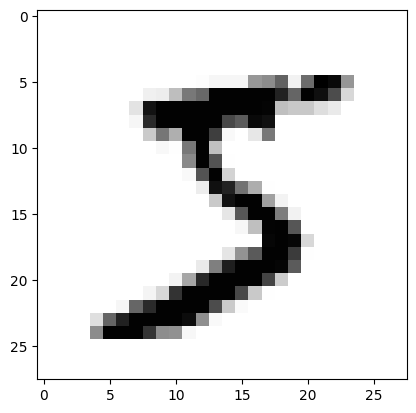

In [70]:
# 첫번째 이미지 확인
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [71]:
#이미지 생성 원리 알고 싶어요
# 첫번째 이미지 원리 확인
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%-3s' %i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [72]:
#차원 변환 과정 실습
# x_train.shape[0] #60000장
x_train = x_train.reshape(x_train.shape[0], 28*28) #2차원 >> 1차원 배열 (784 = 28 * 28)
x_train = x_train.astype('float32') # 정수 >> 실수
x_train = x_train / 255 #정규화 (명도 0 ~ 1 사이로 나타내기 위함) (영상 명도는 등급 0~255)

In [73]:
# x_test.shape[0] #10000장

x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

In [74]:
#클래스 (cls) 값 확인
print('class : %d' %(y_train[0]))

class : 5


In [75]:
#이진화 (binary) >> one-hot 인코딩

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [76]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [83]:
#딥러닝 기본  프레임 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [84]:
#mnist data 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#차원 변환 후 학습용, 평가용 분리
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)


In [85]:
#모델 구조 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#모델 최적환 위한 설정 구간
# MODEL_DIR = '/content/drive/MyDrive/딥러닝/data/model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)
modelpath = '/content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [87]:
#모델 실행
history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
          callbacks=[early_stopping_callback, checkpointer])




Epoch 1: val_loss improved from inf to 0.19079, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.19079 to 0.14626, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.14626 to 0.11188, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11188 to 0.10009, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10009 to 0.09530, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09530 to 0.09013, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09013 to 0.08867, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08867 to 0.07886, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.07886

Epoch 10: val_loss did not improve from 0.07886

Epoch 11: val

In [88]:
print('Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 1s 1ms/step - loss: 0.0709 - accuracy: 0.9814
Test Accuracy: 0.9814


In [91]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

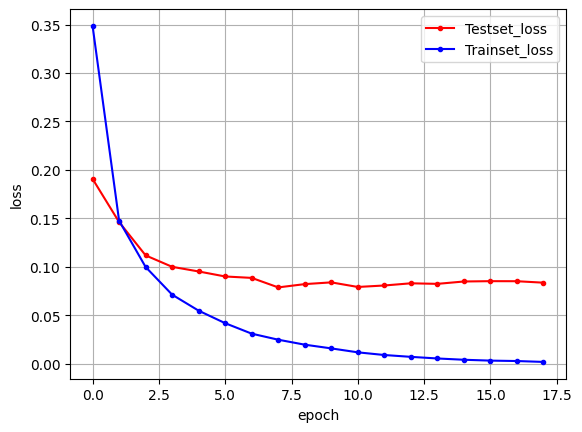

In [94]:
#딥러닝 기본 프레임 만들기
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss'] #학습셋의 오차

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN 실행

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

#mnist data 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#차원 변환 후 학습용, 평가용 분리
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [96]:
#모델 실행
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # 네트워크를 끊음
model.add(Flatten()) # 평탄화
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
'''
1. conv2d
입력값 (28,28,1) # (세로,세로,채널) >> 채널 1 :흑백, 3: 컬러
kernel (3,3) / 32개 >> 32개 결과물
bias(편항) 필터 개수와 동일하게 32
파라미터 계산 : (3*3*1*32) + 32 = 320

2. conv2d_1
입력값 (26,26,32) # 32 >> 장수
kernel (3,3) / 64개 >> 64개 결과물
bias(편항) 필터 개수와 동일하게 64
파라미터 계산 : (3*3*64*32) + 64 = 18496

3. max_pooling2d
입력값(24,24,64)
pool_size (2,2)
출력값 (12,12,64)

4. dropout
무작위 네트워크 꺼줌(변화없음)

5. flatten 차원축소 2 >> 1차원
입력값 (12, 12, 64)
출력값 (9216)
(12 * 12 * 64) = 9216

6. dense_6
입력값 9216
뉴런수 128
파라미터 (9216 * 128 + 128 ) 1,179,776

7. dense_7
입력값 128
뉴런수 10
파라미터 (128 * 10 + 10) 1290

훈련 가능한 파라미터는 (320 + 18496 + 1,179,776 + 1290) = 1199882
'''

In [97]:
#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

modelpath = '/content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [98]:
#모델 실행
history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
          callbacks=[early_stopping_callback, checkpointer])

print('Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))



Epoch 1: val_loss improved from inf to 0.08209, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.08209 to 0.05658, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.05658 to 0.05552, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.05552 to 0.04420, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 5: val_loss did not improve from 0.04420

Epoch 6: val_loss did not improve from 0.04420

Epoch 7: val_loss improved from 0.04420 to 0.04141, saving model to /content/drive/MyDrive/딥러닝/data/model/MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.04141

Epoch 9: val_loss did not improve from 0.04141

Epoch 10: val_loss did not improve from 0.04141

Epoch 11: val_loss did not improve from 0.04141

Epoch 12: val_loss did not improve from 0.04141

Epoch 13: val_loss did not improve from 0.04141

Epoch 14: val_loss did not improve from 0.04141

Epoch 15: val_loss improved from 0.04141 to 0.04077, s

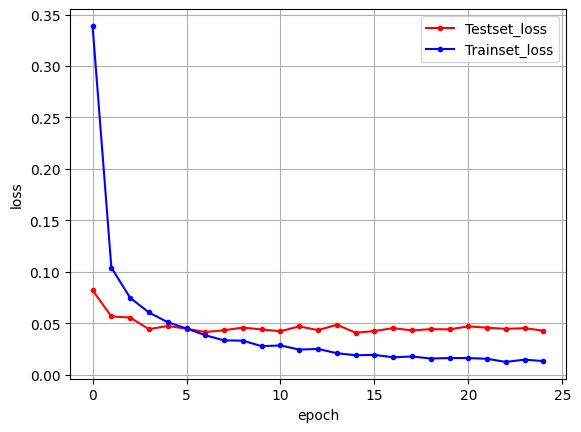

In [99]:
#딥러닝 기본 프레임 만들기
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss'] #학습셋의 오차

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()